[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/y-akbal/Tedu_Time_Series/blob/main/W4/W4P2.ipynb)

In [50]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
def create_ma(A : np.array, theta : np.array, c_0: float = 0):
  p = len(theta)-1 ### theta is here our coefficients  and A is our samples, we can constantly create models outta it!
  L = [] 
  L.append(c_0)
  i = 0
  while True:   #### why we have a while loop here who is going to explain????? 
    try:
      dot = c_0+theta[0]-np.dot(theta[1:], A[i:i+p])   ### explain here very clearly!
      L.append(dot)
      i += 1
    except Exception:
      return L


In [52]:
theta = np.random.randn(30)  ### these are your weights
A = np.random.randn(100000)   #### these are your sample a_t white noise!

In [53]:
L = create_ma(A, theta ,c_0 = 5)

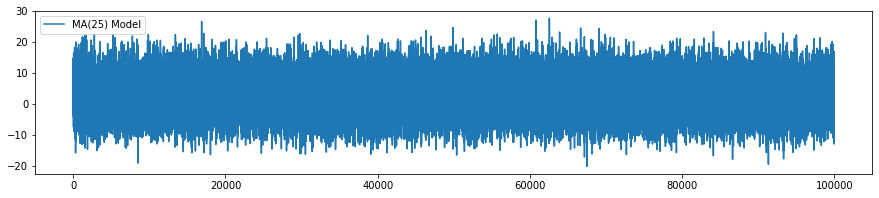

In [54]:
plt.figure(figsize = (15,3))
plt.plot(L, label = "MA(25) Model")
plt.legend(fontsize = 10)
plt.show()

In [55]:
np.mean(L)

3.074918463280444

In [56]:
np.var(L, ddof = 1)

29.301332776820175

In [57]:
variance = (1+sum([i**2 for i in theta]))
print(variance)

34.3369274195569


See these two guys are almost the same, above we have the variance of the series. Below we have the variance coming from the formula!

In [58]:
import statsmodels

In [59]:
statsmodels.__version__

'0.12.2'

In [60]:
from statsmodels.graphics.tsaplots import plot_acf

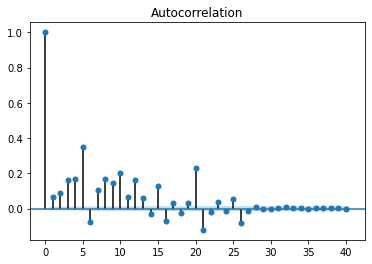

In [61]:
plot_acf(np.array(L), alpha = 0.001, lags = 40);   ###### Brace yourself and witness the power of science!

In [62]:
from statsmodels.tsa.stattools import acf

In [63]:
acf_ = acf(np.array(L), nlags = 100, fft = True)

In [64]:
acf_  #### this dude is a numpy array

array([ 1.00000000e+00,  6.64917419e-02,  9.04668537e-02,  1.63559746e-01,
        1.65433446e-01,  3.50430453e-01, -7.79291734e-02,  1.03734835e-01,
        1.70404175e-01,  1.45561699e-01,  2.04332438e-01,  6.65388418e-02,
        1.62803409e-01,  6.07321532e-02, -2.94547534e-02,  1.26581724e-01,
       -6.91630325e-02,  3.27399310e-02, -2.76064386e-02,  2.94403084e-02,
        2.27399157e-01, -1.20881470e-01, -1.81640247e-02,  3.55202947e-02,
       -1.13223320e-02,  5.51798605e-02, -8.39270675e-02, -1.35100192e-02,
        8.00844307e-03, -3.38853481e-04, -2.52899002e-03,  2.21292856e-03,
        7.00995716e-03,  2.56749477e-03,  4.92520036e-03,  3.50987189e-04,
        4.86574655e-03,  3.60045773e-03,  6.09859354e-04,  9.06154816e-04,
       -3.60172907e-04,  4.87367220e-03, -1.41436546e-03,  1.95191492e-03,
        6.42096681e-03,  1.37617821e-03, -4.62843166e-05, -1.92344577e-03,
        2.28345363e-03,  1.98437057e-03, -3.62168039e-03, -1.72023934e-03,
        3.76234055e-04,  

In [65]:
np.sum(abs(acf_) >= 1e-2)

30